# UNIVERSIDAD POLITECNICA SALESIANA

## Examen Inteligencia Artificial

### Narcisa Araujo

### Enunciado:

- Diseñe y desarrolle un sistema recopilador que permita obtener las noticias o facebook de los candidatos y almacenar dentro de una base de datos orientados a grafos:
  Webscraping es la técnica de extraer datos contenidos en un formato no estructurado en una página web y llevarlos a una estructura fácil de usar.
  Es por ello, que se desea crear nuevos métodos que permitan la recopilación masiva de informaciones para su posterior estudio y correlación en forma de big data.
  En base a ello, vamos a obtener los datos de lo que esta hablando las noticias de los candidatos dentro del Ecuador y almacenar los datos dentro de una base de datos orientadas a grafos.
https://www.google.com/search?tbm=nws&sxsrf=ALeKk01Q48xyd7421N_rrjzDN56Mnp8FTg:1607467777701&q=candidatos+ecuador&spell=1&sa=X&ved=0ahUKEwioo4KPvL_tAhXFrFkKHXv8CC8QBQgvKAA&biw=1920&bih=915&dpr=1
- Generar un modelo que permita obtener y almacenar los datos en los grafos.
- Vincular los datos con el candidato seleccionado.
- Se debe tener al menos 1000 nodos generados, en caso de tener estos datos seleccionar al partido (UNES) (UNES AZUAY) (Candidato Presidencial)
- Obtener de la noticia: el Link, mensaje, fecha
- Facebook: Comentarios, Publicaciones, Amigos, Likes, Seguidores, etc.
- No se debe repetir los candidatos a asambleístas dentro del Foro del partido político de UNES AZUAY (10 primeros) .
- Se puede utilizar cualquier herramienta o procesamiento para el WebScarping.
- Generar sus análisis, conclusiones y recomendaciones en base a  los datos


In [1]:
from neo4j import GraphDatabase

class Neo4jService(object):

    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()      
    
    def crear_cabecera(self, tx, nombre):
        tx.run("CREATE (:Cabecera {nombre: $nombre})", nombre=nombre)
    
    def crear_candidato(self, tx, nombre):
        tx.run("CREATE (:Candidato {nombre: $nombre})", nombre=nombre)

    def crear_noticias(self, tx, nombre):
        tx.run("CREATE (:Noticias {nombre: $nombre})", nombre=nombre)
        
    def crear_contenido(self, tx, nombre):
        tx.run("CREATE (:Contenido {nombre: $nombre})", nombre=nombre)
        
    def crear_titulo(self, tx, nombre):
        tx.run("CREATE (:Titulo {nombre: $nombre})", nombre=nombre)

    def crear_fecha(self, tx, nombre):
        tx.run("CREATE (:Fecha {nombre: $nombre})", nombre=nombre)
        
    def crear_relacion_noticia(self, tx, nombre_noticias, nombre_noticia):
        tx.run("MATCH (a:Noticias {nombre: $nombre_noticias}) "
               "MATCH (b:Contenido {nombre: $nombre_noticia}) "
               "MERGE (a)-[:Noticias]->(b)",
               nombre_noticias=nombre_noticias, nombre_noticia=nombre_noticia)
  
        
    def crear_relacion_cabeceras(self, tx, nombre_cabecera, nombre_titulo):
        tx.run("MATCH (a:Cabecera {nombre: $nombre_cabecera}) "
               "MATCH (b:Titulo {nombre: $nombre_titulo}) "
               "MERGE (a)-[:TituloNoticia]->(b)",
               nombre_cabecera=nombre_cabecera, nombre_titulo=nombre_titulo)
    
    def crear_relacion_fecha(self, tx, nombre_fechas, nombre_fecha):
        tx.run("MATCH (a:Fecha {nombre: $nombre_fechas}) "
               "MATCH (b:Fecha {nombre: $nombre_fecha}) "
               "MERGE (a)-[:Fecha_enlace]->(b)",
               nombre_fechas=nombre_fechas, nombre_fecha=nombre_fecha)

    #relacion de candidato   cabecera links noticias 
    def crear_relacion_candidato_titulo(self, tx, nombre_candidato, nombre_titulo):
        tx.run("MATCH (a:Candidato {nombre: $nombre_candidato}) "
               "MATCH (b:Cabecera {nombre: $nombre_titulo}) "
               "MERGE (a)-[:Candidato_Titulo]->(b)",
               nombre_candidato=nombre_candidato, nombre_titulo=nombre_titulo)
        
    def crear_relacion_candidato_fecha(self, tx, nombre_candidato, nombre_fecha):
        tx.run("MATCH (a:Candidato {nombre: $nombre_candidato}) "
               "MATCH (b:Fecha {nombre: $nombre_fecha}) "
               "MERGE (a)-[:Candidato_Fecha]->(b)",
               nombre_candidato=nombre_candidato, nombre_fecha=nombre_fecha)
    
    def crear_relacion_candidato_contenido(self, tx, nombre_candidato, nombre_noticias):
        tx.run("MATCH (a:Candidato {nombre: $nombre_candidato}) "
               "MATCH (b:Noticias {nombre: $nombre_noticias}) "
               "MERGE (a)-[:Candidato_Noticias]->(b)",
               nombre_candidato=nombre_candidato, nombre_noticias=nombre_noticias)
        
print("ok")

ok


In [2]:
import requests
from bs4 import BeautifulSoup

neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'egfa2209')
with neo4j._driver.session() as session:

    session.write_transaction(neo4j.crear_candidato , "Candidato")
    session.write_transaction(neo4j.crear_cabecera , "Titulos")
    session.write_transaction(neo4j.crear_fecha , "Fecha")
    session.write_transaction(neo4j.crear_noticias , "Noticias")
with open("C:/Users/narcisa/Documents/9no/deberes quisi/DEBERES-SE-IA/IA/Examen IA/Presidente.txt","r") as archivo:
        
    for linea in archivo:
        print(linea)

        page = requests.get(linea)
        soup = BeautifulSoup(page.content,'html.parser')
        #print(soup.prettify())
        
        #titulos
        titulos =soup.find_all("div",{"class":"BNeawe vvjwJb AP7Wnd"})
        #Contenido
        contenidohtml =soup.find_all("div",{"class":"BNeawe s3v9rd AP7Wnd"})
        #Fecha
        fecha =soup.find_all("span",{"class":"r0bn4c rQMQod"})
        
        print("Resultado de la busqueda de los links ")
        a=0

        tituloNeo=list()
        for i in titulos:
            tituloNeo.append(i.text)

        descripcion=list()
        for i in contenidohtml:
            descripcion.append(i.text)
            #print(link)
            
#descripcion filtrada
        descripcionAux=list()    
        for elemento in descripcion:
            if((a%2)==0):
                descripcionAux.append(descripcion[a])
            a=a+1
            

        fechaNeo=list()
        for i in fecha:
            fechaNeo.append(i.text)

        
            
        print("Titulo")
        for elemento in tituloNeo:
            session.write_transaction(neo4j.crear_titulo , elemento)
            print(elemento)
            
        #Descripcion print("descripcion")
        for elemento1 in descripcionAux:
            session.write_transaction(neo4j.crear_contenido , elemento1)
            print(elemento1)
        
        
        print("fecha")
             
        #relacion de Fecha
        for elemento2 in fechaNeo:
            session.write_transaction(neo4j.crear_fecha , elemento2)
            session.write_transaction(neo4j.crear_relacion_fecha, "Fecha", elemento2)  
            print(elemento2)            


        #relacion de descripcion
        for total in descripcionAux:
            session.write_transaction(neo4j.crear_relacion_noticia, "Noticias", total)  
       
            
        #relacion de Titulo  
        for titul in tituloNeo:
            session.write_transaction(neo4j.crear_relacion_cabeceras, "Titulos", titul) 
           
            
            
session.write_transaction(neo4j.crear_relacion_candidato_titulo, "Candidato", "Titulos")
session.write_transaction(neo4j.crear_relacion_candidato_contenido, "Candidato", "Noticias")
session.write_transaction(neo4j.crear_relacion_candidato_fecha,"Candidato", "Fecha")
print("fin del proceso")

https://www.google.com/search?biw=1536&bih=754&sxsrf=ALeKk01rNV7G2EJ-J_z_todRgKp3YLY3fw%3A1608752869806&ei=5Z7jX5nbMIzl5gL46rWYAg&q=candidato+a+la+presidencia+arauz+&oq=candidato+a+la+presidencia+arauz+&gs_lcp=CgZwc3ktYWIQAzIGCAAQFhAeOgQIIxAnOgQIABADOgIIADoFCAAQyQM6AgguOgQIABAeUJHsF1j2nhhg8sQYaAFwAHgAgAHYAogBqR6SAQgwLjIyLjAuMZgBAKABAaoBB2d3cy13aXrAAQE&sclient=psy-ab&ved=0ahUKEwjZ4de67-TtAhWMslkKHXh1DSM4ChDh1QMIDQ&uact=5

Resultado de la busqueda de los links 
Titulo
El candidato presidencial Andrés Arauz informa que dio positivo a ...
Andrés Arauz ✓
Andrés Arauz Galarza - Wikipedia, la enciclopedia libre
Candidato presidencial Andrés Arauz contagiado de Covid-19
Andrés Arauz, el economista que quiere emular a Rafael Correa
El candidato presidencial Andrés Arauz confirmó que tiene covid-19
¿Quién es Andrés Arauz candidato a la presidencia? - Gk.City
Andrés Arauz: Indulto a Rafael Correa no será necesario porque los ...
Ecuador: la fórmula Arauz-Rabascall, afín a Correa, espera la luz ..

1 oct. 2020 · ... (UNES) también deberá subsanar en 48 horas una inconsistencia en la cédula de ciudadanía del candidato a la presidencia Andrés Arauz.
fecha
17 ago. 2020
 · 
21 dic. 2020
 · 
5 dic. 2020
 · 
19 dic. 2020
 · 
1 nov. 2020
 · 
19 dic. 2020
 · 
19 dic. 2020
 · 
1 oct. 2020
 · 
https://www.google.com/search?q=candidato+a+la+presidencia+arauz&sxsrf=ALeKk00iVXR0RiVVZp8nXaSJV7gbHMFKUg:1608753347137&ei=w6DjX_ztB-X85gKg6KOwAg&start=30&sa=N&ved=2ahUKEwi826We8eTtAhVlvlkKHSD0CCY4FBDy0wN6BAgFED4&biw=1536&bih=754

Resultado de la busqueda de los links 
Titulo
El Consejo Nacional Electoral aprueba la candidatura Arauz - La Hora
Candidato presidencial Andrés Arauz contagiado de Covid-19 ...
Andrés Arauz, candidato presidencial ecuatoriano por el correísmo ...
Candidato presidencial Andrés Arauz tiene coronavirus | Diario La ...
Lasso, Arauz y Yaku Pérez lideran las encuestas para las ...
Andrés Arauz ya es formalmente candidato a la Presidencia de ...
Binomio Arauz-Correa registra insc

 · 
hace 7 horas
 · 
hace 8 días
 · 
hace 7 horas
 · 
hace 18 horas
 · 
hace 6 horas
 · 
hace 9 horas
 · 
hace 7 horas
 · 
hace 16 horas
 · 
https://www.google.com/search?q=candidato+a+la+presidencia+arauz&sxsrf=ALeKk00dTFkl6wFhPN5PhMClUtSphcKrGg:1608753376448&ei=4KDjX9foGoXt5gLz-rOoBA&start=60&sa=N&ved=2ahUKEwjX2KKs8eTtAhWFtlkKHXP9DEU4MhDy0wN6BAgFEEQ&biw=1536&bih=754

Resultado de la busqueda de los links 
Titulo
Candidato Andrés Arauz se pronuncia tras superar el coronavirus ...
Andrés Arauz acepta candidatura a presidencia de Ecuador ...
Lasso lidera las encuestas para las elecciones del 2021. - CREO ...
Centro Democrático elige a Correa y Arauz para elecciones en ...
Rafael Correa y Andrés Arauz ganan las primarias del Centro ...
En Ecuador se definen los candidatos para las elecciones ...
Con una condena por corrupción, Rafael Correa será candidato ...
Las elecciones más cruciales en América Latina en 2021 (y por qué ...
Arauz lidera encuestas pese a costosa campaña de Lasso y otr

Resultado de la busqueda de los links 
Titulo
En dos jornadas se harán los tres debates con los candidatos a la ...
Rafael Correa confirma su candidatura a la vicepresidencia en las ...
Ecuador y la segunda ola progresista | Confirmado.net
Ecuador: Cuenta regresiva para unas elecciones presidenciales ...
En dos jornadas se harán los tres debates con los candidatos a la ...
En dos jornadas se harán los tres debates con los candidatos a la ...
En dos jornadas se harán los tres debates con los candidatos a la ...
[PDF] plétora de incertidumbres - Análisis Semanal
BINOMIO ARAUZ-CORREA ES ELEGIDO POR CENTRO ...
hace 7 horas · Arauz no participará y el aspirante Yaku Pérez dejó entrever en Twitter que no asistiría, indicó El ... https://www.eluniverso.com/noticias/2021/01/08/nota/ 9320230/dos-jornadas-se-haran-tres-debates-candidatos-presidencia ...
18 ago. 2020 · Rafael Correa confirma su candidatura a la vicepresidencia en las elecciones del 2021 ... Correa formará binomio con Andrés Arauz

5 dic. 2020
 · 
19 dic. 2020
 · 
19 dic. 2020
 · 
https://www.google.com/search?q=candidato+a+la+presidencia+arauz+2021&sxsrf=ALeKk01GfeV2oqzRLi5esNqIu5CnFsX4mQ:1608753605784&ei=xaHjX7emL8-w5wLFw66AAg&start=30&sa=N&ved=2ahUKEwj3nNCZ8uTtAhVP2FkKHcWhCyA4KBDy0wN6BAgFED8&biw=1536&bih=754

Resultado de la busqueda de los links 
Titulo
¿Quién es Andrés Arauz? Conoce al binomio presidencial de ...
Andrés Arauz, candidato a la Presidencia de Ecuador: "Jamás ...
UNES postula a Andrés Arauz y Rafael Correa como su binomio ...
Rafael Correa queda definitivamente fuera de la papeleta electoral ...
Andrés Arauz, candidato presidencial ecuatoriano por el correísmo ...
Andrés Arauz ya es formalmente candidato a la Presidencia de ...
Ecuador: Rafael Correa postulará a vicepresidencia en las ... - Gestión
Andrés Arauz Galarza – Arauz – Rabascall
¡Ahora sí! El binomio del correísmo es admitido para las elecciones ...
Órgano electoral de Ecuador analizará si descalifica al binomio ...
18 ago. 2020 · A Ar

19 dic. 2020
 · 
hace 3 días
 · 
9 dic. 2020
 · 
1 nov. 2020
 · 
1 oct. 2020
 · 
https://www.google.com/search?q=candidato+a+la+presidencia+arauz+2021&sxsrf=ALeKk02erGmJ4Gr7oUCQqpdNcRjESjow7w:1608753634465&ei=4qHjX-bmG4i25gLHuJn4BQ&start=0&sa=N&ved=2ahUKEwjm36an8uTtAhUIm1kKHUdcBl84ChDy0wN6BAgFEDk&biw=1536&bih=754

Resultado de la busqueda de los links 
Titulo
Andrés Arauz: Indulto a Rafael Correa no será necesario porque los ...
Andrés Arauz Galarza - Wikipedia, la enciclopedia libre
El candidato presidencial Andrés Arauz confirmó que tiene covid-19
El candidato presidencial Andrés Arauz informa que dio positivo a ...
Ecuador: la fórmula Arauz-Rabascall, afín a Correa, espera la luz ...
Candidato presidencial Andrés Arauz lidera encuestas en Ecuador ...
Cinco de los 16 candidatos a la Presidencia han ... - El Telégrafo
Andrés Arauz no participará en debate presidencial ... - El Telégrafo
Binomio Arauz-Rabascall queda en firme para las elecciones de 2021
Andrés Arauz, el candidato del c

 · 
1 oct. 2020
 · 
28 sep. 2020
 · 
19 ago. 2020
 · 
1 oct. 2020
 · 
10 sep. 2020
 · 
23 sep. 2020
 · 
https://www.google.com/search?q=candidato+a+la+presidencia+partido+unes+arauz&sxsrf=ALeKk01AVyVJHzZhf8vufii2NZvItcne7A:1608753919782&ei=_6LjX_GaL-uH5wL50pa4Dg&start=30&sa=N&ved=2ahUKEwixlq2v8-TtAhXrw1kKHXmpBec4KBDy0wN6BAgFED8&biw=1536&bih=754

Resultado de la busqueda de los links 
Titulo
Finalmente, aprueban la fórmula del correísmo Arauz... | Página12
Candidato presidencial de Ecuador Arauz da positivo al covid-19 ...
Andrés Arauz llama a sus partidarios a movilizarse y denuncia ...
Arauz pide vigilancia internacional por impugnación a su candidatura
TCE acepta recurso para impugnar candidatura de UNES : País : La ...
Rafael Correa confirma su candidatura a la vicepresidencia de ...
Ecuador marca un récord de candidatos presidenciales con 17 ...
CNE aprueba candidatura de Arauz y Rabascall de la alianza UNES
Ecuador: candidato presidencial del partido de Correa dice que ...
Rafael 

 · 
20 nov. 2020
 · 
1 oct. 2020
 · 
20 nov. 2020
 · 
16 dic. 2020
 · 
9 dic. 2020
 · 
https://www.google.com/search?q=candidato+a+la+presidencia+partido+unes+arauz&sxsrf=ALeKk02lMyLV7b86lI8xw6_qBgW2S0Xteg:1608753945614&ei=GaPjX6XzJMWB5wLl4LWACg&start=0&sa=N&ved=2ahUKEwjl49W78-TtAhXFwFkKHWVwDaA4ChDy0wN6BAgFEDk&biw=1536&bih=754
Resultado de la busqueda de los links 
Titulo
Ecuador: la fórmula Arauz-Rabascall, afín a Correa, espera la luz ...
Candidato presidencial Andrés Arauz contagiado de Covid-19
Binomio Arauz-Rabascall queda en firme para las elecciones de 2021
Andrés Arauz pide vigilancia internacional tras retraso en ...
CNE califica al binomio del correísmo Arauz - Rabascall para ...
Andrés Arauz Galarza - Wikipedia, la enciclopedia libre
Andrés Arauz: Indulto a Rafael Correa no será necesario porque los ...
¿Quién es Andrés Arauz candidato a la presidencia? - Gk.City
El candidato presidencial Andrés Arauz confirmó que tiene covid-19
Andrés Arauz no participará en debate presiden

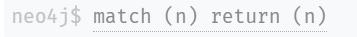

## Nodos

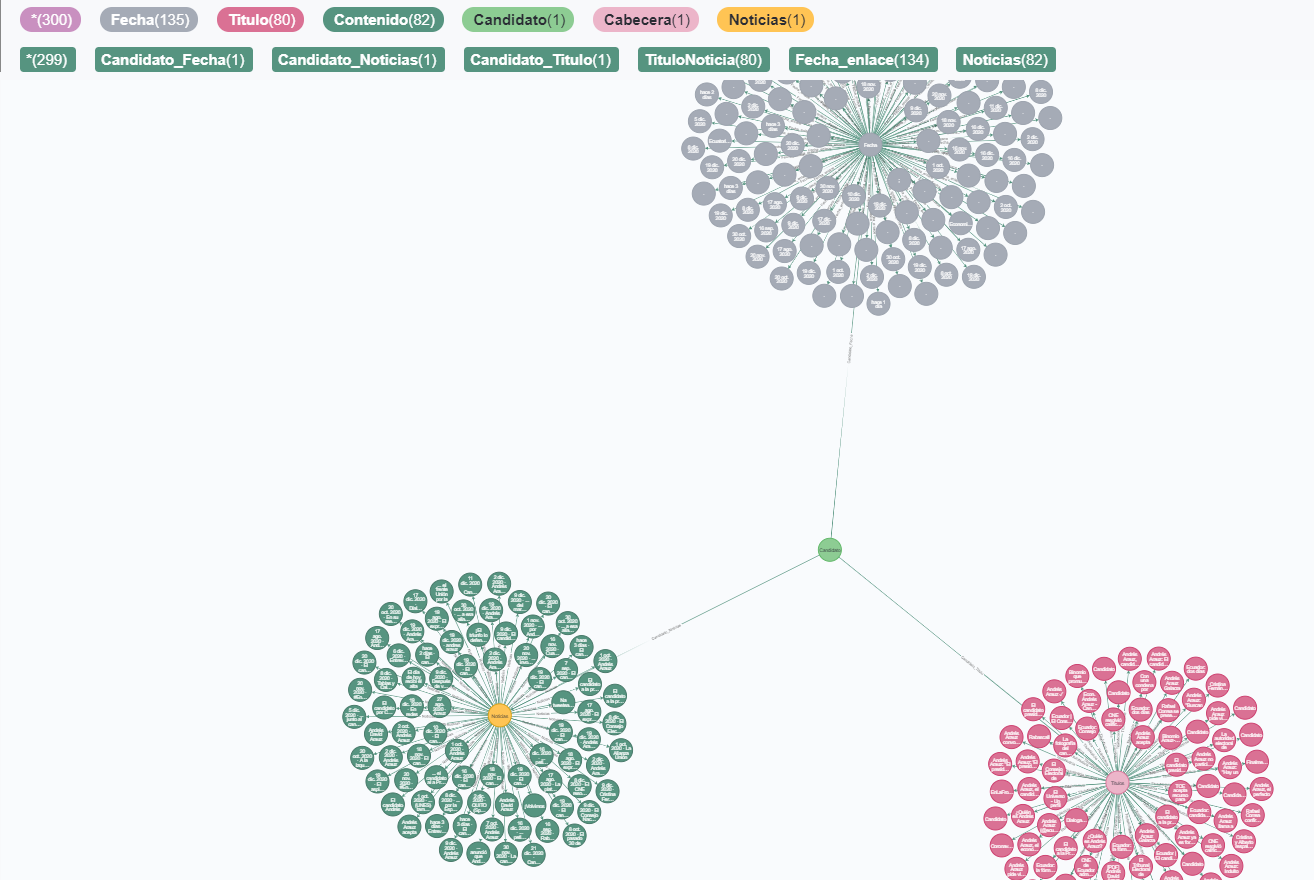

## Total Nodos